In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\devan\AppData\Local\Temp\ipykernel_41696\3338272293.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\devan\\OneDrive\\Desktop\\MCA\\datasets\\Asteroids Classification\\nasa.csv")

In [3]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


# deleting redundant and low variance columns

In [11]:
df.drop(columns = ['Name','Est Dia in M(min)', 'Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)','Relative Velocity km per hr','Miles per hour','Miss Dist.(miles)','Miss Dist.(lunar)','Miss Dist.(Astronomical)','Orbiting Body','Equinox'], inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Absolute Magnitude            4687 non-null   float64
 2   Est Dia in KM(min)            4687 non-null   float64
 3   Est Dia in KM(max)            4687 non-null   float64
 4   Close Approach Date           4687 non-null   object 
 5   Epoch Date Close Approach     4687 non-null   float64
 6   Relative Velocity km per sec  4687 non-null   float64
 7   Miss Dist.(kilometers)        4687 non-null   float64
 8   Orbit ID                      4687 non-null   int64  
 9   Orbit Determination Date      4687 non-null   object 
 10  Orbit Uncertainity            4687 non-null   int64  
 11  Minimum Orbit Intersection    4687 non-null   float64
 12  Jupiter Tisserand Invariant   4687 non-null   float64
 13  Epo

# convert into datetime types

In [17]:
df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'], dayfirst = True)
df['Epoch Date Close Approach'] = pd.to_datetime(df['Epoch Date Close Approach'], unit='ms')
df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date'], dayfirst = True)


In [19]:
df['Est Dia in KM(avg)'] = (df['Est Dia in KM(min)'] + df['Est Dia in KM(max)'])/2

In [20]:
df.drop(columns = ['Est Dia in KM(min)' , 'Est Dia in KM(max)'], inplace = True)

In [21]:
df = df[['Neo Reference ID', 'Absolute Magnitude', 'Est Dia in KM(avg)','Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(kilometers)', 'Orbit ID', 'Orbit Determination Date',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous']]

In [22]:
df

,Neo Reference ID,Absolute Magnitude,Est Dia in KM(avg),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Determination Date,Orbit Uncertainity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,21.600,0.205846,1995-01-01,1995-01-01 07:56:40,6.115834,6.275369e+07,17,2017-04-06 08:36:00,5,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,True
1,3723955,21.300,0.236343,1995-01-01,1995-01-01 07:56:40,18.113985,5.729815e+07,21,2017-04-06 08:32:00,3,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,False
2,2446862,20.300,0.374578,1995-01-08,1995-01-08 08:00:00,7.590711,7.622912e+06,22,2017-04-06 09:20:00,0,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,True
3,3092506,27.400,0.014241,1995-01-15,1995-01-15 08:03:20,11.173875,4.268362e+07,7,2017-04-06 09:15:00,6,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,False
4,3514799,21.600,0.205846,1995-01-15,1995-01-15 08:03:20,9.840831,6.101082e+07,25,2017-04-06 08:57:00,1,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,23.900,0.071374,2016-09-08,2016-09-08 07:33:20,22.154265,6.187511e+06,4,2017-04-06 08:24:00,8,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2457708.228,304.306024,0.787436,False
4683,3759295,28.200,0.009852,2016-09-08,2016-09-08 07:33:20,3.225150,9.677324e+05,2,2017-04-06 08:23:00,6,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2458087.617,282.978786,0.884117,False
4684,3759714,22.700,0.124035,2016-09-08,2016-09-08 07:33:20,7.191642,9.126775e+06,17,2017-04-06 08:23:00,6,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2458300.480,203.501147,0.521698,False
4685,3759720,21.800,0.187734,2016-09-08,2016-09-08 07:33:20,11.352090,3.900908e+07,6,2017-04-06 08:23:00,5,...,21.080244,163.802909,662.048343,1.185467,180.346090,1.787733,2458288.261,203.524965,0.543767,False


In [23]:
df.isna().sum()

Neo Reference ID                0
Absolute Magnitude              0
Est Dia in KM(avg)              0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Miss Dist.(kilometers)          0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly                    0
Mean Motion                     0
Hazardous                       0
dtype: int64

In [24]:
# Selecting relevant features
features = df[['Absolute Magnitude', 'Est Dia in KM(avg)', 'Relative Velocity km per sec',
               'Miss Dist.(kilometers)', 'Eccentricity', 'Semi Major Axis',
               'Inclination', 'Orbital Period']]

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

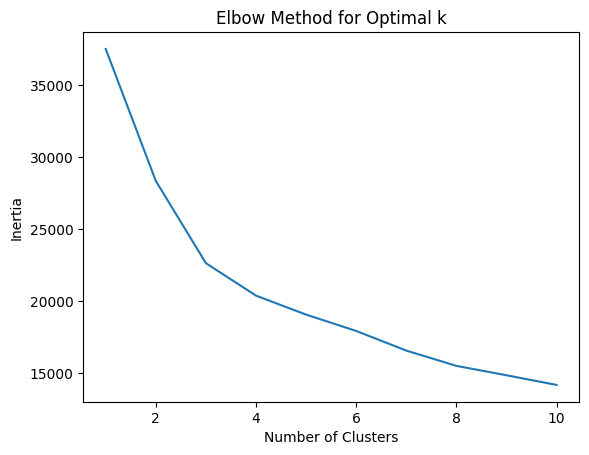

In [41]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Determining the number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [27]:
# Let's assume the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

         Neo Reference ID  Absolute Magnitude  Est Dia in KM(avg)  \
Cluster                                                             
0            3.501058e+06           24.850302            0.071149   
1            3.368524e+06           21.804818            0.325401   
2            2.817515e+06           18.776493            1.023714   
3            3.176115e+06           21.393157            0.317567   

                  Close Approach Date     Epoch Date Close Approach  \
Cluster                                                               
0       2008-02-04 04:20:53.384912896 2008-02-04 11:46:58.955512576   
1       2008-11-25 12:00:49.035187456 2008-11-25 19:25:31.668558336   
2       2006-04-25 01:07:14.782608640 2006-04-25 08:34:26.022544384   
3       2006-04-24 12:32:36.425948672 2006-04-24 19:58:21.346389248   

         Relative Velocity km per sec  Miss Dist.(kilometers)   Orbit ID  \
Cluster                                                                    
0     

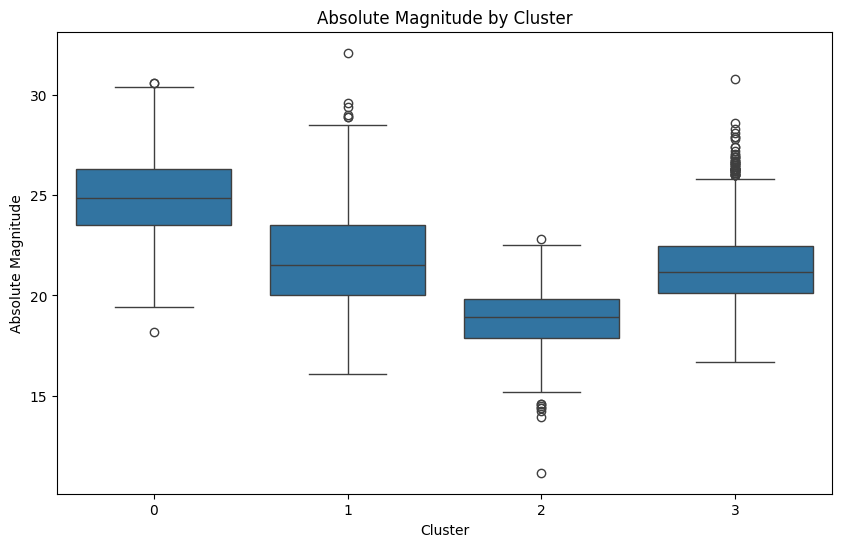

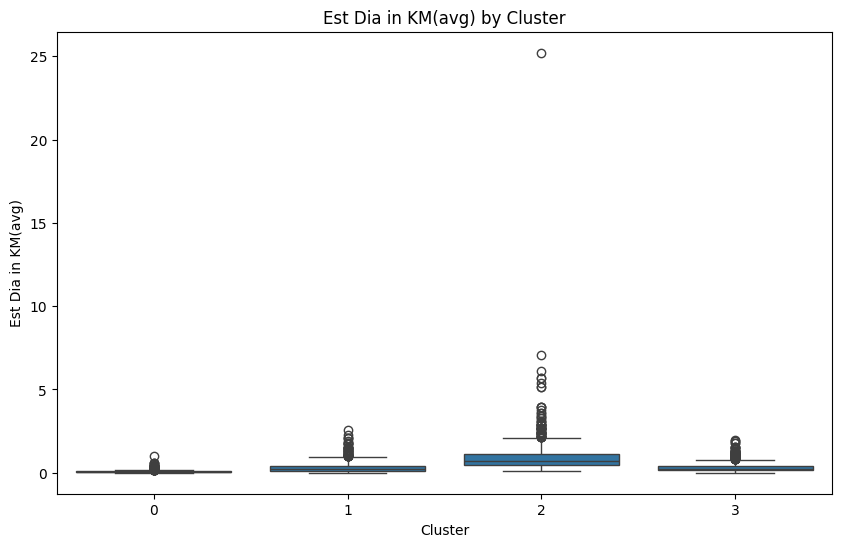

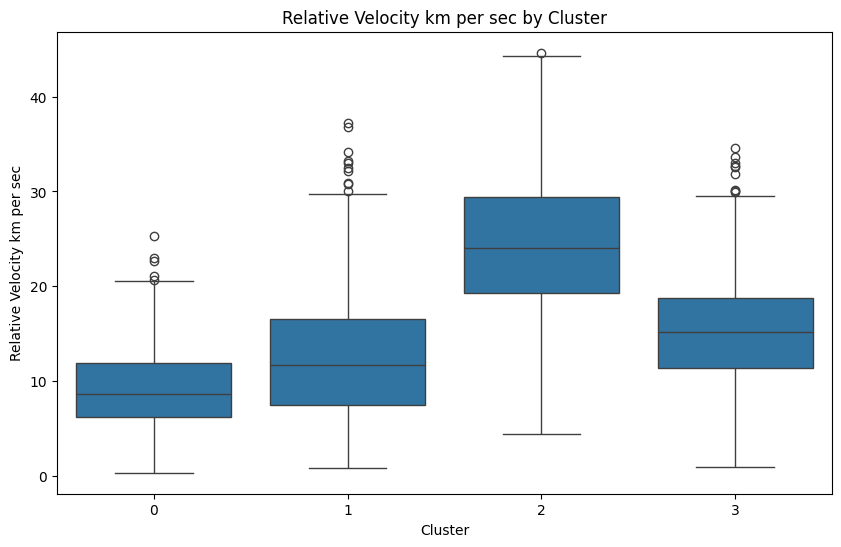

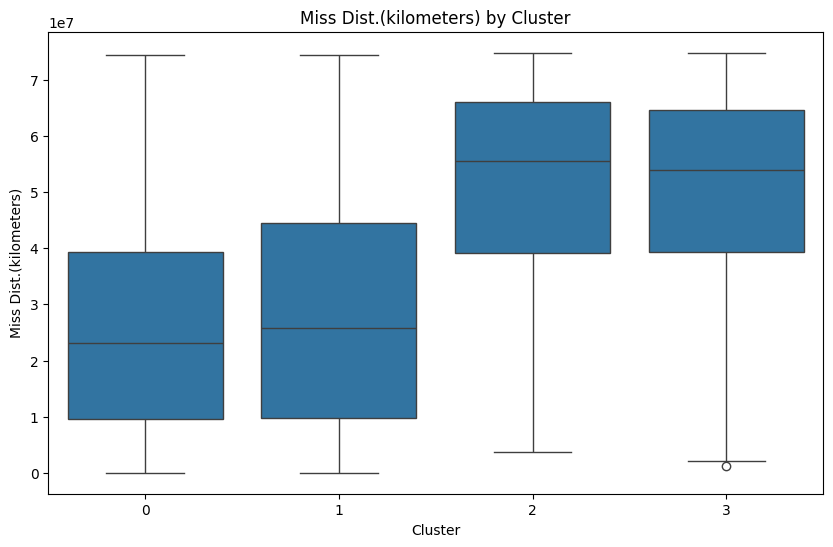

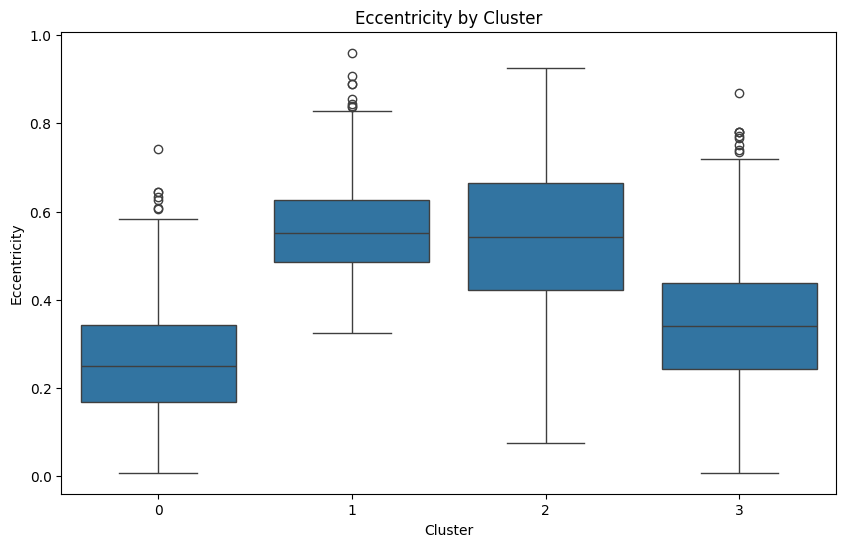

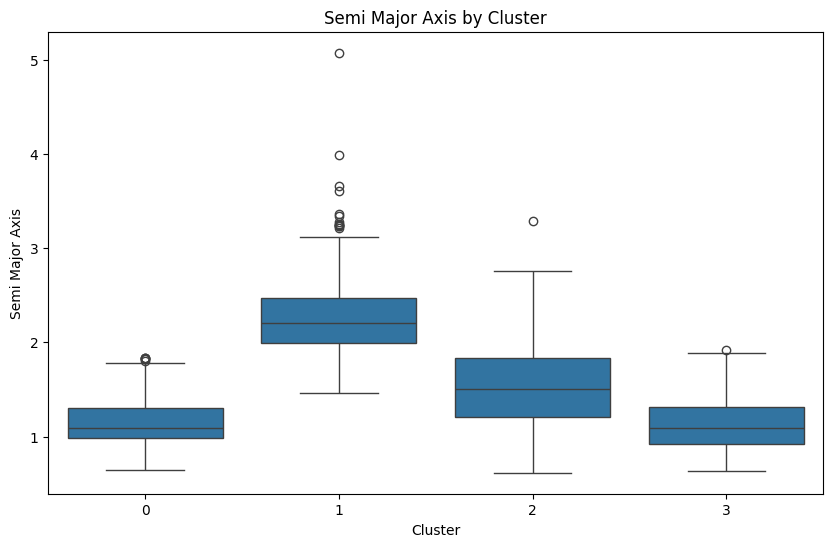

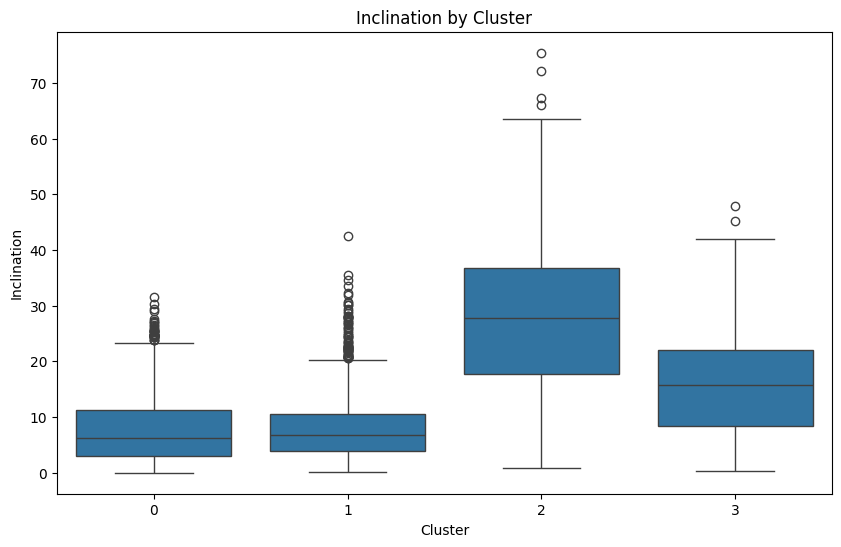

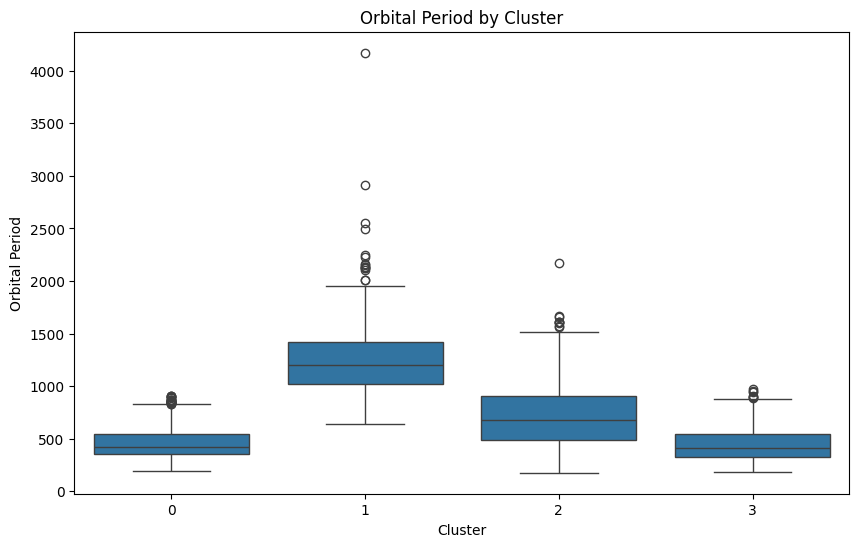

In [32]:
# Group by cluster and calculate mean values
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# For a more detailed analysis, you can plot histograms or boxplots of features per cluster
import seaborn as sns

for feature in features.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} by Cluster')
    plt.show()


In [42]:
print(df['Cluster'].value_counts())


Cluster
3    1634
0    1551
1     881
2     621
Name: count, dtype: int64


In [37]:
# Print cluster distribution
print(df['Cluster'].value_counts())

# Mapping clusters to inferred types
cluster_to_type = {
    0: 'C-type',
    1: 'M-type',
    2: 'S-type',
    3: 'D-type'
}

# Ensure all clusters are mapped to a type
df['Type'] = df['Cluster'].map(cluster_to_type)

# If there are unmapped clusters, print them
unmapped_clusters = df[df['Type'].isnull()]['Cluster'].unique()
if len(unmapped_clusters) > 0:
    print(f"Unmapped clusters: {unmapped_clusters}")

# Fill any unmapped clusters with a default type (optional)
df['Type'].fillna('Unknown', inplace=True)

# Display the classification results
print(df[['Neo Reference ID', 'Type']])


Cluster
3    1634
0    1551
1     881
2     621
Name: count, dtype: int64
      Neo Reference ID    Type
0              3703080  D-type
1              3723955  D-type
2              2446862  C-type
3              3092506  C-type
4              3514799  D-type
...                ...     ...
4682           3759007  D-type
4683           3759295  C-type
4684           3759714  C-type
4685           3759720  D-type
4686           3772978  S-type

[4687 rows x 2 columns]


C:\Users\devan\AppData\Local\Temp\ipykernel_41696\149476961.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna('Unknown', inplace=True)


In [40]:
# Display the first few rows with the classified types
print(df[['Neo Reference ID', 'Type']])



      Neo Reference ID    Type
0              3703080  D-type
1              3723955  D-type
2              2446862  C-type
3              3092506  C-type
4              3514799  D-type
...                ...     ...
4682           3759007  D-type
4683           3759295  C-type
4684           3759714  C-type
4685           3759720  D-type
4686           3772978  S-type

[4687 rows x 2 columns]


<Axes: ylabel='Type'>

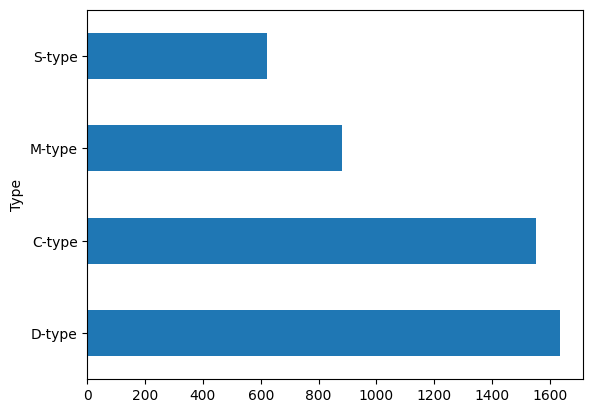

In [45]:
df.Type.value_counts().plot.barh()

In [47]:
s_type_df = df[(df.Type == 'S-type')]
c_type_df = df[(df.Type == 'C-type')]
m_type_df = df[(df.Type == 'M-type')]
d_type_df = df[(df.Type == 'D-type')]


In [52]:
print(f's-type df: {s_type_df.shape}')
print(f'c-type df: {c_type_df.shape}')
print(f'm-type df: {m_type_df.shape}')
print(f'd-type df: {d_type_df.shape}')


s-type df: (621, 27)
c-type df: (1551, 27)
m-type df: (881, 27)
d-type df: (1634, 27)


In [75]:
# def main_params_df(df):
#     # Print data types of columns to identify Timestamp columns
#     print("Data types of columns:\n", df.dtypes)
    
#     # Check which columns are present in the DataFrame
#     cols_to_drop = [col for col in ['Type', 'Unnamed: 0'] if col in df.columns]
    
#     # Drop the existing columns
#     df_dropped = df.drop(cols_to_drop, axis=1)
    
#     # Exclude columns with Timestamps
#     df_excluded = df_dropped.select_dtypes(exclude=['datetime', 'timedelta'])
    
#     # Perform the sum operation
#     param_df = df_excluded.T.sum(axis=1).to_frame('value')
    
#     # Filter and sort the DataFrame
#     param_df = param_df[(param_df.T != 0).any()]
#     param_df = param_df.sort_values(by='value', ascending=False, inplace=False)
    
#     return param_df


In [76]:
# s_type = main_params_df(s_type_df)

In [71]:
# s_type_df.head(10).plot.barh()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# SMOTE 

# Polynomial regression

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("C:\\Users\\devan\\Downloads\\archive (15)\\Position_Salaries.csv")

In [81]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [92]:
X = df.iloc[:, 1:2].values
y = df.iloc[:,2].values

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [95]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [97]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [98]:
def viz_linear():
    plt.scatter(X,y,color = 'red')
    plt.plot(X,lin_reg.predict(X), color = 'blue')
    plt.title('Linear Regression Model')
    plt.xlabel('Position level')
    plt.ylabel('salary')
    plt.show()
    return 

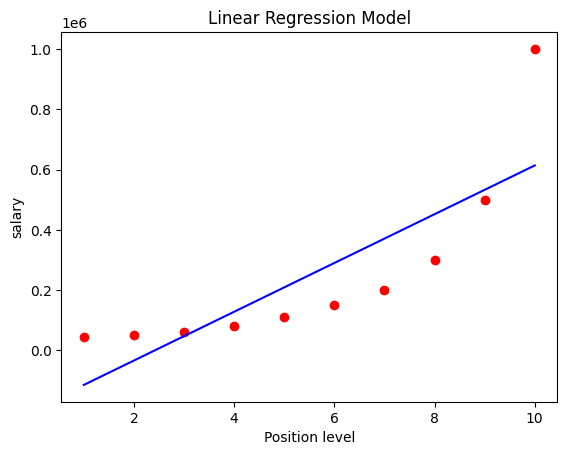

In [100]:
viz_linear()

In [129]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # creating feature upto 4 degree
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
# X_pol/y

LinearRegression()

In [117]:
def viz_polynomial():
    plt.scatter(X,y,color = 'red')
    plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)), color = 'blue')
    plt.title('Linear Regression Model')
    plt.xlabel('Position level')
    plt.ylabel('salary')
    plt.show()
    return 

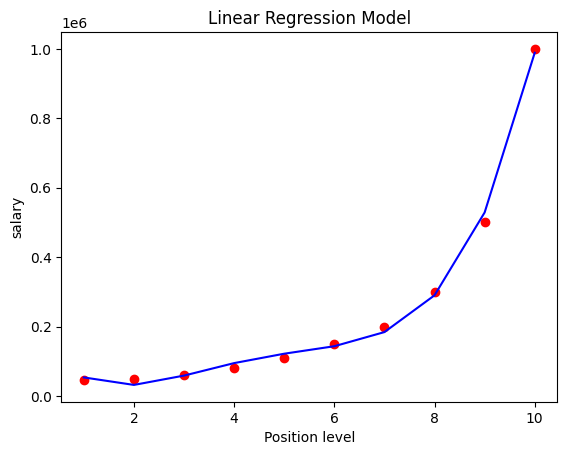

In [118]:

viz_polynomial()

In [124]:
lin_reg.predict([[5.5]])

array([249500.])

In [125]:
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750002])

# Ridge Rigression/ Ridge Regularization 

In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score , RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
df = pd.read_csv("C:\\Users\\devan\\Downloads\\archive (17)\\BostonHousing.csv")

In [132]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     501 non-null    float64
 1   zn       501 non-null    float64
 2   indus    501 non-null    float64
 3   chas     501 non-null    int64  
 4   nox      501 non-null    float64
 5   rm       501 non-null    float64
 6   age      501 non-null    float64
 7   dis      501 non-null    float64
 8   rad      501 non-null    int64  
 9   tax      501 non-null    int64  
 10  ptratio  501 non-null    float64
 11  b        501 non-null    float64
 12  lstat    501 non-null    float64
 13  medv     501 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.7 KB


In [154]:
df= df.dropna()

In [155]:
X = df.drop(['medv'], axis = 1)
y = df['medv']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3, random_state=42)

In [159]:
Ridge_model = Ridge(alpha = 1).fit(X_train , y_train)
Ridge_model.intercept_

29.878723319566177

In [160]:
y_pred = Ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5.135562415611374

In [161]:
Ridge_model.coef_

array([-0.01772143,  0.06361389,  0.04615384, -1.69678656, -5.23605865,
        3.15349666,  0.04294458, -1.00273488,  0.22698656, -0.01097084,
       -1.01037484,  0.01540338, -0.75167972])

In [162]:
r2_score(y_test, y_pred)

0.6980827775988547

In [166]:
from sklearn.model_selection import GridSearchCV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = np.arange(0,1,0.1)
model = Ridge()
search = GridSearchCV(model , grid , scoring='neg_mean_absolute_error', cv = cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print('MAE: %.3f' % results.best_score_ )
print('Config: %s' % results.best_params_)


MAE: -3.895
Config: {'alpha': 0.9}


In [167]:
Ridge_model = Ridge(alpha = 1).fit(X_train , y_train)
y_pred = Ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5.135562415611374

In [170]:
r2_score(y_test, y_pred)

0.6980827775988547

In [172]:
pd.Series(Ridge_model.coef_, index = X_train.columns)

crim      -0.017721
zn         0.063614
indus      0.046154
chas      -1.696787
nox       -5.236059
rm         3.153497
age        0.042945
dis       -1.002735
rad        0.226987
tax       -0.010971
ptratio   -1.010375
b          0.015403
lstat     -0.751680
dtype: float64

# Lasso Regression

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso , LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
df = pd.read_csv("C:\\Users\\devan\\Downloads\\archive (18)\\Hitters.csv")

In [176]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [179]:
df['Salary'].fillna(df['Salary'].median(), inplace= True)
df.isna().sum()

C:\Users\devan\AppData\Local\Temp\ipykernel_41696\1659143015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(), inplace= True)


AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [201]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']], drop_first=True, dtype= int)
dms

,League_N,Division_W,NewLeague_N
0,0,0,0
1,1,1,1
2,0,1,0
3,1,0,1
4,1,0,1
...,...,...,...
317,1,0,1
318,0,0,0
319,0,1,0
320,0,0,0


In [202]:
y = df['Salary']
X_ = df.drop(['Salary','League','NewLeague','Division'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N',	'Division_W', 'NewLeague_N']]], axis=1)
 

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.25, random_state=42)

In [204]:
lasso = Lasso().fit(X_train, y_train)
lasso.intercept_

C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.548e+06, tolerance: 1.207e+03
  model = cd_fast.enet_coordinate_descent(


315.11758086920645

In [240]:
lasso.coef_

array([ -2.54848842,   8.857382  ,  18.46300642,  -0.84553279,
        -7.98419241,   5.26796939,  19.70750705,  -0.53183912,
         0.82849978,  -0.48919065,   1.82018106,   1.31322551,
        -0.93132684,   0.21779877,   0.7437786 ,  -3.76299208,
       167.28170851, -64.5908999 , -26.67207549])

In [241]:
y_pred = lasso.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

338.61004204884176

In [242]:
r2_score(y_test, y_pred)

0.3364919209353624

In [243]:
lasso_cv = LassoCV(alphas=np.random.randint(0,1000,100), cv = 10, max_iter=10000, n_jobs=-1).fit(X_train, y_train)

C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected

In [244]:
lasso_cv.alpha_

996

In [245]:
lasso_tuned = Lasso().set_params(alpha = 14).fit(X_train , y_train)
y_pred_tuned = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.156e+06, tolerance: 1.207e+03
  model = cd_fast.enet_coordinate_descent(


332.4744902747789

In [246]:
pd.Series(lasso_tuned.coef_, index = X_train.columns)

AtBat          -2.613152
Hits            8.150611
HmRun          14.819215
Runs            0.000000
RBI            -6.373767
Walks           5.413523
Years          14.689037
CAtBat         -0.510277
CHits           0.842202
CHmRun         -0.521779
CRuns           1.701163
CRBI            1.316633
CWalks         -0.918034
PutOuts         0.204947
Assists         0.745867
Errors         -1.539291
League_N       83.922159
Division_W     -7.871731
NewLeague_N     0.000000
dtype: float64

# Naive Bayes

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs

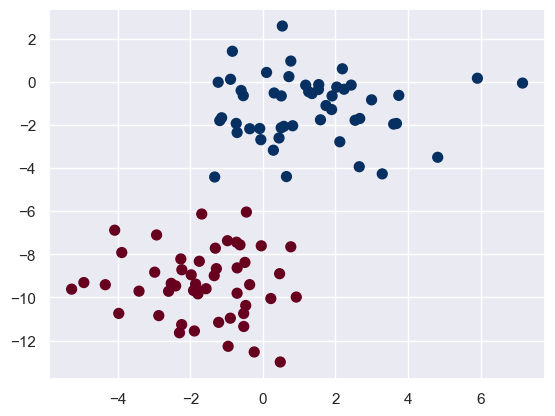

In [254]:
X,y = make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c = y , s = 50, cmap = 'RdBu')

In [255]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [262]:
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,16] * rng.rand(2000,2)
ynew = model.predict(Xnew)

(-6.698899269464606,
 8.699199147412331,
 -14.827981357246935,
 3.4135507026389944)

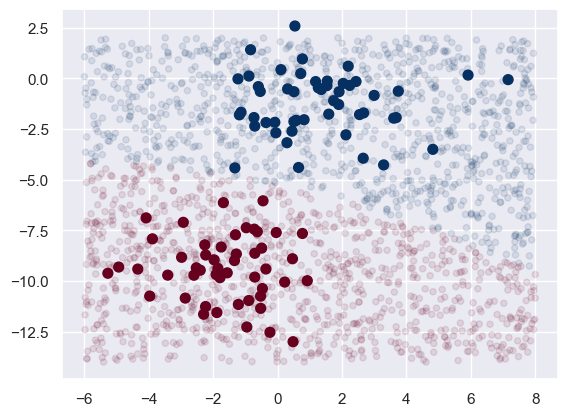

In [263]:
plt.scatter(X[:,0], X[:,1], c = y , s = 50, cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c = ynew , s = 20, cmap = 'RdBu', alpha=0.1)
plt.axis()

In [266]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.63, 0.37]])

# Stochestic Gradiant Decent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
df = load_breast_cancer()
X = df.data
y = df.target

In [4]:
X_train , y_train, X_test, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
class customPerceptron(object):
    def __init__(self, n_iteration = 100, rand)